### COM361 &mdash; Introdução a Otimização &mdash; 2022, Prof. Amit ###

# Gerenciamento de Dívidas de Cartões de Crédito #

#### Camila Maia de Carvalho (camilamaia@poli.ufrj.br), Ruth Menezes (ruthmenezesbr@poli.ufrj.br)

*****

### Índice

1. [Introdução](#1.-Introdução)
2. [Modelo Matemático](#Modelo)
3. [Solução](#3.-Solução)
4. [Resultados e Discussão](#4.-Resultados-e-discussão)
  4.1. [Subseção Opcional](#4.A.-Acrescente-subseções-se-necessário)
5. [Conclusão](#5.-Conclusão)
6. [Referências bibliográficas] (#6.-Referências bibliográficas)

   Resolving package versions...
  No Changes to `C:\Users\016733631\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\016733631\.julia\environments\v1.8\Manifest.toml`


  0.089652 seconds (22.19 k allocations: 1.146 MiB, 97.76% compilation time: 100% of which was recompilation)


In [20]:
Pkg.add("Clp")
Pkg.add("JuMP")
Pkg.add("Plots")
Pkg.add("LinearAlgebra")
Pkg.add("MosekTools")
Pkg.add("StatsPlots")

   Resolving package versions...
  No Changes to `C:\Users\016733631\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\016733631\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\016733631\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\016733631\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\016733631\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\016733631\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\016733631\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\016733631\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\016733631\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\016733631\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\016733631\.julia\envi

## 1. Introdução ##

O projeto em questão visa o estudo e a elaboração de um modelo de otimização de gerenciamento de dívidas de cartões de crédito, de forma a obter uma solução viável economicamente para saldá-las. 

Esse tema mostra-se de extrema relevância no cenário atual de endividamento da população brasileira. De acordo com o portal de notícias do G1, atualmente o país conta com cerca de 69 milhões de pessoas inadimplentes, sendo as dívidas de cartão de crédito o motivo de mais da metade desses endividamentos. Esse fato é de extrema preocupação, dado que o cartão é uma das modalidades com os juros mais altos do mercado e, em caso de desorganização financeira, a dívida tende a continuar aumentando, podendo chegar a se tornar uma pendência de valor exorbitante e insustentável a longo prazo.

Dessa forma, é fundamental que as pessoas tenham ferramentas que as auxiliem na plena administração de suas dívidas e, por esse motivo, será feita a construção do modelo de gerenciamento de dívidas de cartão de crédito. Nele, será pautado um indivíduo que possui mais de uma dívida, em diferentes cartões, sujeitos a condições distintas referentes a cada instituição credora.

Em suma, ao longo desse relatório será apresentado um modelo considerando um indíviduo endividado, que possui três cartões de crédito com saldos distintos ($x_1$,$x_2$ e $x_3$), sujeitos a diferentes taxas de juros ($\alpha_1$ , $\alpha_2$ e $\alpha_3$). Também será levada em consideração a existência de uma conta corrente de saldo $y(k)$, da qual é retirada uma quantia $u(k)$, utilizada para pagar a dívida no instante $k$.

Além disso, baseado nos mais recentes relatórios do Banco Central do Brasil, será considerada para esse modelo uma taxa de juros de cheque especial de aproximadamente $7,8\%$ ao mês e uma taxa básica de juros para o país em torno de $1,4\%$ ao mês.

## 2. Modelo Matemático <a class="anchor" id="Modelo"></a> 

O modelo matemático que descreve o problema se dá pela equação abaixo: 

$x_i(k + 1) = (1 + \alpha_i)x_i(k) - u_i(k)$

Isto é, o saldo do cartão $i$ no instante $(k + 1)$ é igual a $1$ mais a taxa de juros, multiplicada pelo saldo no instante $k$, subtraída do valor $u(k)$ retirado da conta corrente para quitar parte da dívida. Dessa forma, é criada a codição de juros compostos, que aumentam a dívida exponencialmente com o passar do tempo.

Além disso, pode ser modelada também a conta corrente: 

$y(k+1) = y(k) - u_{total}(k)$

Em outros termos, o saldo da conta corrente no momento $k + 1$ é igual ao saldo da conta no instante $k$ menos o valor total $u(k)$ retirado da conta para saldar a dívida. 

Sendo essas as restrições definidas para o nosso problema, pode-se apontar também as variáveis de decisão e a função objetivo. Nesse caso, as variáveis de decisão são representadas pelos pagamentos mensais realizados para saldar a dívida, pois isso é de fato o que o indívudo pode controlar, e o saldo das dívidas dos três cartões em cada instante de tempo. Já para a função objetivo a ser otimizada, tem-se o modelo quadrático proposto pelo livro "Introduction to Optimization", de Edwin K. P. Chong e Stanislaw H.:

minimizar 
$\frac{1}{2}\sum_{i=1}^{n}(q(x_i)^2 + r(u_i)^2)$

Bem como aponta o livro citado, os parâmetros $q$ e $r$ refletem a prioridade no trade-off entre a redução da dívida e a dificuldade de pagamento da mesma. Quanto mais ansioso o indivíduo estiver para reduzir a sua dívida, maior o valor de $q$ em relação a $r$. Por outro lado, quanto mais relutante ele estiver em realizar os pagamentos, maior será o valor de $r$ em relação a $q$. Variando esses parâmetros, é possível otimizar a dívida levando em consideração pessoas em diferentes situações financeiras. 

O modelo em questão é do tipo LQR (Linear Quadratic Regulator), onde busca-se controlar a função combinando dois objetivos conflitantes de forma a manter um estado pequeno, enquanto mantém-se também um esforço de controle pequeno.

Tendo tudo isso em mente, pode-se chegar na seguinte descrição formal para o problema:

minimizar 

$\frac{1}{2} \sum_{i=1}^{n} q((x_{1i})^2 + (x_{2i})^2 + (x_{3i})^2) + r((u_{1i})^2 + (u_{2i})^2 + (u_{3i})^2) $

Sujeito a: 

$x_1(k + 1) = (1 + \alpha_1)x_1(k) - u_1(k) \\ $ 
$x_2(k + 1) = (1 + \alpha_2)x_2(k) - u_2(k) \\ $
$x_3(k + 1) = (1 + \alpha_3)x_3(k) - u_3(k) \\ $
$y(k+1) = y(k) - u_{total}(k) \\ $

## 3. Solução ##

Em primeiro lugar, iremos apresentar uma versão mais simplificada do problema proposto. Nesse caso, iremos considerar que o indivíduo possui apenas uma dívida em um cartão de crédito, sendo a taxa de juros de cheque especial de 7,8% ao mês e um prazo para quitação da dívida de 24 meses.

Além disso, vamos considerar que os parâmetros r e q valem, respectivamente, 10 e 1. Dito isso, é importante lembrar que quanto mais relutante é o indivíduo em fazer pagamentos, maior o valor de r em relação a q.





Nesta seção, coloque seu código em Julia + JuMP e resolva o problema proposto. Seu código deve ser limpo (não macarrônico!), de fácil leitura, bem comentado e anotado e deve compilar sem erros em Julia 1.x, x$\geq 1$! Não valem códigos em outras linguagens. **Vou rodar seu código para avaliar seu projeto**. Sugiro a utilização de múltiplos blocos de códigos separados por blocos de texto (células Markdown) explicando as várias partes da sua solução. Sugiro também a resolução de várias versões do seu problema, com modelos e hipóteses diferentes.

É permitido chamar pacotes externos, mas evite a utilização de bibliotecas exóticas (pois, em geral, não rodam em todas as versões de Julia, e terei que instalar a mesma versão que você usou, ou rodar na plataforma Google Colab, que gostaria de evitar).

In [14]:
using JuMP, Plots, LinearAlgebra, Clp, MosekTools, StatsPlots

Valor pago para quitar a dívida: 6448.54


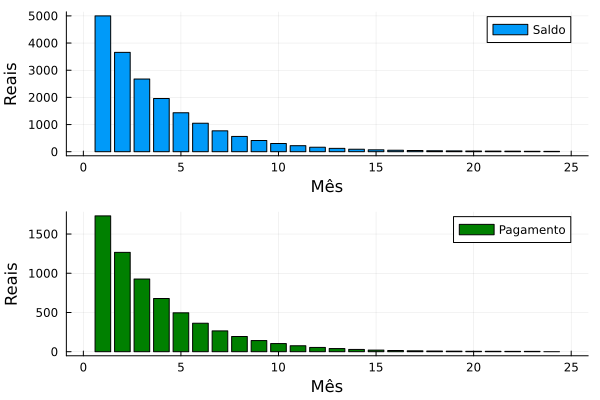

In [43]:
q = 1
r = 10
taxa = 0.078  # Taxa do cheque especial de 7,8% ao mês

t = [i for i=1:24] # Tempo escolhido para quitação da dívida de 24 meses

m = Model(optimizer_with_attributes(Mosek.Optimizer, "QUIET"=>true))

@variable(m, u[i = 1:24]) # Pagamento em cada instante de tempo
@variable(m, x[i = 1:24]) # Saldo da dívida em cada instante de tempo
@variable(m, y[i = 1:24]) # Conta corrente de onde se retira o dinheiro para pagamento da dívida

# Restrições do problema

for t in 1:(size(t)[1]-1)
    @constraint(m, x[t+1] .== (1 + taxa)*x[t] - u[t]) # Dinâmica de juros compostos da dívida
    @constraint(m, y[t+1] .== y[t] - u[t]) # Restrições da conta corrente
end

@constraint(m, x[1] == 5000) # Valor inicial da dívida
#@constraint(m, y[1] == 10000) # Valor inicial em conta corrente
#@constraint(m, y .>= 0)
@constraint(m, x .>= 0)
@constraint(m, u .>= 0)

@objective(m, Min, 0.5*(q*sum(x.^2) +  r*sum(u.^2)) )  #Função Objetivo

optimize!(m)

x = JuMP.value.(x)
u = JuMP.value.(u)

p1 = Plots.bar(t, x, label = "Saldo", xlabel = "Mês", ylabel = "Reais")
p2 = Plots.bar(t, u, label = "Pagamento", color="green", xlabel = "Mês", ylabel = "Reais")


println("Valor pago para quitar a dívida: ", round(sum(u), digits=2))

plot(p1, p2, layout = (2, 1))

Após essa primeira análise, vamos partir para o cerne do problema: um indivíduo que possua três dívidas em 3 cartões distintos na situação abaixo. 

$r = 10*q$

Tarifas mensais relativas a cada cartão: 
Cartão 1 - $\alpha_1 = $
Cartão 2- $\alpha_2 = $
Cartão 3- $\alpha_3 = $

Valor inicial da dívida:  $ $
Valor da divida nos cartões:
 Cartão 1 - $ $
Cartão 2- $ $
Cartão 3- $ $

**Tenha certeza de que seu código compila corretamente! Rodarei seu código!**

## 4. Resultados e discussão ##

Neste seção, os resultados obtidos serão exibidos e discutidos. Mostre figuras, gráficos, imagens, curvas de compromisso, e o que mais puder melhor ilustrar seus resultados. A discussão deverá explicar o que significam os resultados e como interpretá-los. As limitações da sua abordagem/modelo também devem ser colocadas, bem como uma análise da sensibilidade dos resultados em relação às hipóteses feitas.


Utilize plots (veja exemplos  `PyPlot` [aqui](https://gist.github.com/gizmaa/7214002))

Aqui está um exemplo de uma tabela (em Markdown):

| Tabelas        | São           | Boas  |
| ------------- |:-------------:| -----:|
| col 3 é      | alinhado à direita |\$1600 |
| col 2 é      | centrado      |  \$12 |
| texto | também serve      |   \$1 |

### 4.A. Subseções devem ser utilizadas para organizar seu texto.

#### 4.A.a. ou até subsubseções.

## 5. Conclusão ##

Faça um resumo do que encontrou e dos seus resultados, e fale de pelo menos uma direção na qual  seu trabalho pode ser desenvolvido no futuro, algo que poderia ser interessante em decorrência do seu projeto.


## 6. Referências bibliográficas ##

Livro "An introdution to optimization" 
https://medium.com/@controleavancadoemultivariavel/projeto-de-controladores-%C3%B3timos-lqr-42e16cfe48ce
https://fei.edu.br/sbai/SBAI2007/docs/30870_1.pdf
https://www.bcb.gov.br/estatisticas/reporttxjuros?parametros=tipopessoa:1;modalidade:216;encargo:101
https://www.bcb.gov.br/controleinflacao/historicotaxasjuros